In [1]:
# %pip install tensorflow[and-cuda]
%pip install --upgrade setuptools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

2025-01-12 17:18:50.380776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736698730.392350 1650459 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736698730.395932 1650459 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-12 17:18:50.407636: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
%cd /home/elias/Coding/training/Studium/KI/HAW-KI-Praktika

/home/elias/Coding/training/Studium/KI/HAW-KI-Praktika


/home/elias/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import json
import os
from os import listdir
from os.path import isfile, join
import numpy as np

training_path = "./new_training_data/2025-01-10-8/"

# Collect all file paths
files = []
for root, dirs, files_in_dir in os.walk(training_path):
    for file in files_in_dir:
        if os.path.isfile(os.path.join(root, file)):
            files.append(os.path.join(root, file))

matrices = []

# Use os.walk to traverse all subfolders and files
# Read the files and populate matrix_values
for i, file in enumerate(files):
    with open(file) as f:
        d = json.load(f)
        
        # Optionally print or log information
        # print("move:" + str(d["move"]))
        # print("score:" + str(d["score"]))
        
        matrices.append(d["move"])

matrices = np.array(matrices)

# Initialize the matrix_values array
matrix_values = np.zeros(len(files))

# Read the files and populate matrix_values
for i, file in enumerate(files):
    with open(file) as f:
        d = json.load(f)
        
        # Optionally print or log information
        # print("move:" + str(d["move"]))
        # print("score:" + str(d["score"]))
        
        matrix_values[i] = d["score"]


In [5]:
matrice_len = len(matrices[0])
matrice_height = len(matrices[0][0])

print(matrice_len)
print(matrice_height)

8
8


In [6]:
# prompt: generate a custom dataset with random 8x8 matrixes that have the numbers 0-4 on each field. rate each field higher the more high the sum of all fields is.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import random

num_samples = len(matrices)  # Number of samples in the dataset
number_generated_boards = 0

# # Generate random 8x8 matrices with values 0-4 (leave rows 3 to 6 blank)
# def generate_checkerboard():
#     board = [[random.randint(0, 4) for _ in range(8)] for _ in range(8)]

#     # Ensure there's at least one piece of each type (0-3)
#     pieces = [0, 1, 2, 3]
#     for row in range(0, 8):
#         for col in range(8):
#           if len(pieces) == 0:
#               pieces = [0, 1, 2, 3]
#           piece = random.choice(pieces)
#           board[row][col] = piece
#           pieces.remove(piece)

#     global number_generated_boards
#     number_generated_boards += 1

#     # if number_generated_boards % 1000 == 0:
#         # print(f"Generated {number_generated_boards} boards")

#     return board

# matrices = np.array([generate_checkerboard() for _ in range(num_samples)])

# Calculate the real value of each matrix
# the more numbers at top is the higher the value
# so p[0,0] evaluates to matrice_len
# p[0,7] to 0
# p[2,7] to 0
# p[5,6] to 1
# if a 0 is at any position it evaluets to 0
# def calculate_real_value(matrix):
#     rows, cols = len(matrix), len(matrix[0])
#     result = 0

#     for i in range(rows):
#         for j in range(cols):
#             result += matrix[i][j] * (matrice_len - (i + j))

#     return result

# matrix_values = np.zeros(num_samples)
# for i in range(num_samples):
#     matrix_values[i] = np.sum(calculate_real_value(matrices[i]))


# Normalize
# max = 100
# min = 0
print("min: " + str(np.min(matrix_values)))
print("max: " + str(np.max(matrix_values)))
# normalized_sums = (matrix_values - min) / (max - min)
normalized_sums = (matrix_values - np.min(matrix_values)) / (np.max(matrix_values) - np.min(matrix_values))

# Create labels based on normalized sums (higher sum = higher rating)
labels = normalized_sums.reshape(-1, 1)
non_normalized_labels = matrix_values.reshape(-1, 1)

# Reshape matrices to be compatible with neural network input (samples, 8, 8, 1)
reshaped_matrices = matrices.reshape(-1, matrice_len, matrice_height, 1)

# Convert to tensors
matrices_tensor = tf.convert_to_tensor(reshaped_matrices, dtype=tf.float32)
labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)

print("Shape of matrices:", matrices_tensor.shape)
print("Shape of labels:", labels_tensor.shape)

# Example usage of the dataset (assuming you have a model defined)
# model.fit(matrices_tensor, labels_tensor, epochs=10)

min: 0.0
max: 100.0


I0000 00:00:1736698737.802968 1650459 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9536 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


Shape of matrices: (100000, 8, 8, 1)
Shape of labels: (100000, 1)


In [7]:
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


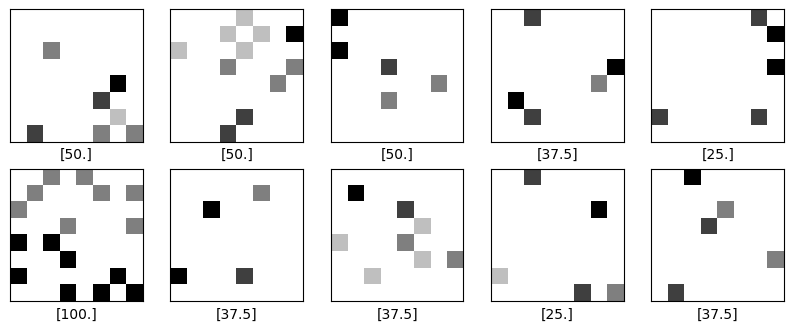

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# plot 10 with labels
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(matrices[i], cmap=plt.cm.binary)
    plt.xlabel(non_normalized_labels[i])
plt.show()


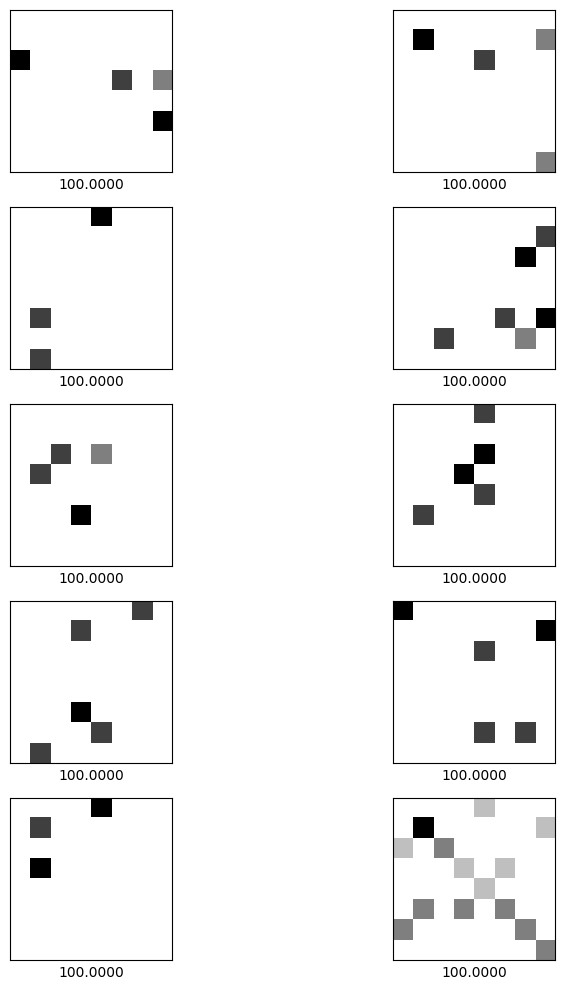

In [9]:
## highest prediction value ##
import random
import numpy as np
import matplotlib.pyplot as plt

# Get indices of the top 10 highest prediction values
top_10_indices = np.argsort(non_normalized_labels.flatten())[-10:]

# Plot the top 10 predictions
plt.figure(figsize=(10, 10))
for i, idx in enumerate(top_10_indices):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape for imshow
    plt.imshow(matrices[idx].reshape(matrice_len, matrice_height), cmap=plt.cm.binary)
    plt.xlabel(f"{non_normalized_labels[idx][0]:.4f}")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [10]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam
# from keras import regularizers

# model = Sequential()

# # First convolutional block with Batch Normalization
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(matrice_len, matrice_height, 1)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# # Second convolutional block with Batch Normalization
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# # Flatten the output and add dense layers
# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.4))

# model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
# model.add(Dropout(0.3))

# # Output layer
# model.add(Dense(1, activation='linear'))

# # Compile the model
# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# # Display model summary
# model.summary()

In [11]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam
# from keras import regularizers

# # model02:
# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(matrice_len, matrice_height, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.4))

# model.add(Dense(1, activation='linear'))

# # Compile and fit
# optimizer = Adam(learning_rate=0.00005)  # Reduce learning rate to avoid overshooting during optimization
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# # Display model summary
# model.summary()


In [12]:
# %pip install scikeras

In [13]:
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import RandomizedSearchCV

# # 'learning_rate': [0.0001, 0.001, 0.01],
# # 'dropout_rate_1': [0.3, 0.4, 0.5],
# # 'dropout_rate_2': [0.3, 0.4, 0.5],
# # 'dropout_rate_3': [0.3, 0.4, 0.5],
# # 'filter_1': [32, 64],
# # 'filter_2': [64, 128],
# # 'dense_units_1': [128, 256],
# # 'dense_units_2': [64, 128],
# # 'batch_size': [16, 32, 64],

# # Wrap model creation function in KerasRegressor
# model = KerasRegressor(
#     build_fn=create_model, 
#     epochs=25, 
#     batch_size=32, 
#     verbose=0, 
#     learning_rate=0.001, 
#     filter_1=64,
#     filter_2=128,
#     dropout_rate_1=0.3,
#     dropout_rate_2=0.3,
#     dropout_rate_3=0.5,
#     dense_units_1=256,
#     dense_units_2=128
# )


In [14]:
from keras import regularizers
from keras.layers import Input
from keras.optimizers import Adam

# model01:

model = Sequential()
model.add(Flatten(input_shape=(matrice_len, matrice_height)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

# Example with adjusted learning rate
optimizer = Adam(learning_rate=0.0001)  # Reduced learning rate further

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

model.summary()


/home/elias/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
# split sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matrices, labels, test_size=0.2, random_state=42)

In [17]:
%pip uninstall -y scikit-learn
%pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
# # Define the hyperparameter grid
# param_grid = {
#     'learning_rate': [0.0001, 0.001],
#     'dropout_rate_1': [0.3, 0.4],
#     'dropout_rate_2': [0.3],
#     'filter_1': [32],  # Only use one filter size for now
#     'filter_2': [64],
#     'dense_units_1': [128],
#     'dense_units_2': [64],
#     'batch_size': [16, 32],  # Use smaller batch sizes
# }


# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1)

# # Fit the model
# random_search_result = random_search.fit(X_train, y_train)

# # Print the best hyperparameters and the corresponding score
# print(f"Best Hyperparameters: {random_search_result.best_params_}")
# print(f"Best Score: {random_search_result.best_score_}")

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# model.compile(loss='mse', optimizer='adam', metrics=['mae'])
# model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# history = model.fit(X_train, y_train,
#                     epochs=25,
#                     batch_size=32,  # Add batch size
#                     validation_split=0.2,
#                     callbacks=[early_stopping])

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])


Epoch 1/50


I0000 00:00:1736698745.883395 1650549 service.cc:148] XLA service 0x7fceb800a7c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736698745.883435 1650549 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2025-01-12 17:19:05.910101: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736698745.999439 1650549 cuda_dnn.cc:529] Loaded cuDNN version 90300


  74/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4876 - mae: 0.4931  

I0000 00:00:1736698747.518970 1650549 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2746 - mae: 0.3427 - val_loss: 0.2103 - val_mae: 0.3188 - learning_rate: 1.0000e-04
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2045 - mae: 0.3162 - val_loss: 0.1929 - val_mae: 0.3166 - learning_rate: 1.0000e-04
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1883 - mae: 0.3151 - val_loss: 0.1787 - val_mae: 0.3157 - learning_rate: 1.0000e-04
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1734 - mae: 0.3124 - val_loss: 0.1666 - val_mae: 0.3141 - learning_rate: 1.0000e-04
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1636 - mae: 0.3142 - val_loss: 0.1567 - val_mae: 0.3141 - learning_rate: 1.0000e-04
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1544 - mae: 0.3140 - val_loss: 0.1490 - val_mae: 0.3137 - learning_rate: 1.0000e-04
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1477 - mae: 0.3147 - val_loss: 0.1427 - val_mae: 0.3133 - l

In [20]:
model.save("model.keras")

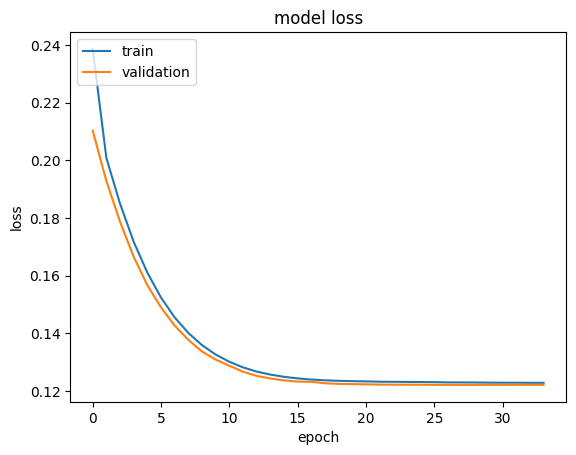

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

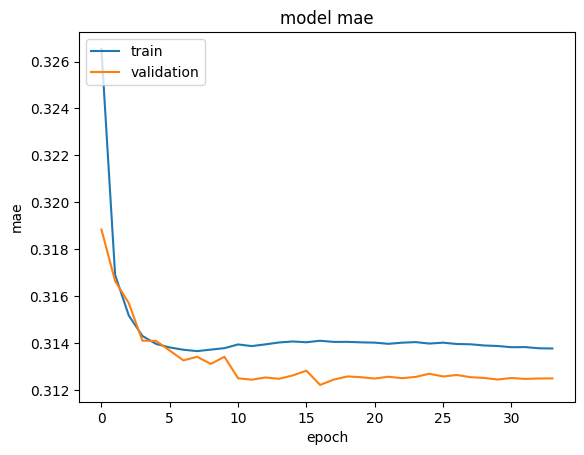

In [22]:
plt.plot(history.history['mae'])
# plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mae'])
# plt.plot(history.history['val_mean_squared_error'])

plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [23]:
y_test.shape

(20000, 1)

In [24]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the MAE, MSE, and R²
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.3155
Mean Squared Error (MSE): 0.1237
R² Score: 0.0012


In [26]:
from sklearn.metrics import accuracy_score
# convert floats to integer (*10)
predictions_acc = (predictions * 10).astype(int)
y_test_acc = (y_test * 10).astype(int)
accuracy = accuracy_score(y_test_acc, predictions_acc)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 8.25%


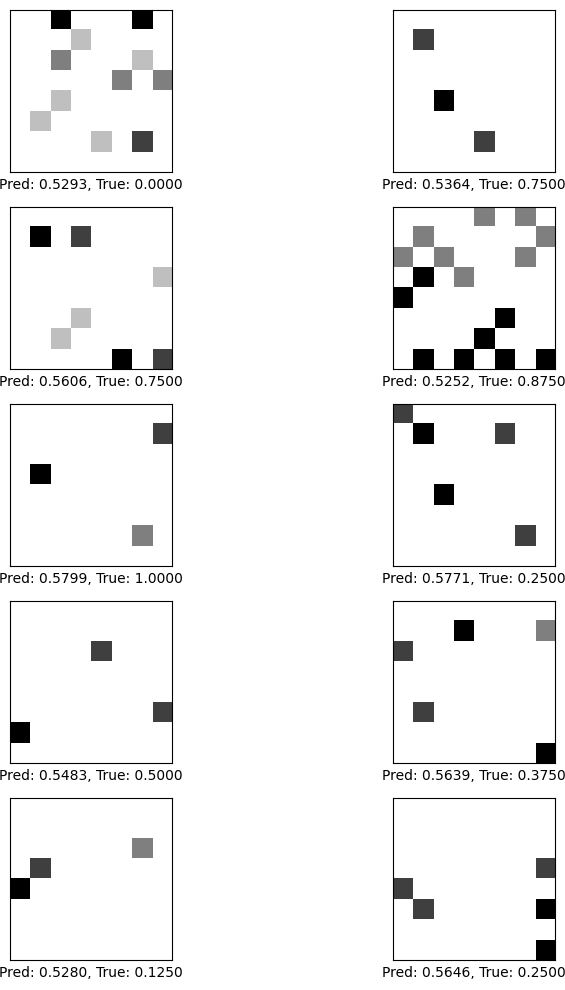

In [27]:
import random

# Plot predictions with true values
plt.figure(figsize=(10, 10))
for i in range(10,20):
    plt.subplot(5, 2, i%10 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[random.randint(0, len(X_test))].reshape(matrice_len, matrice_height), cmap=plt.cm.binary)  # Reshape for imshow
    plt.xlabel(f"Pred: {predictions[i][0]:.4f}, True: {y_test[i][0]:.4f}")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

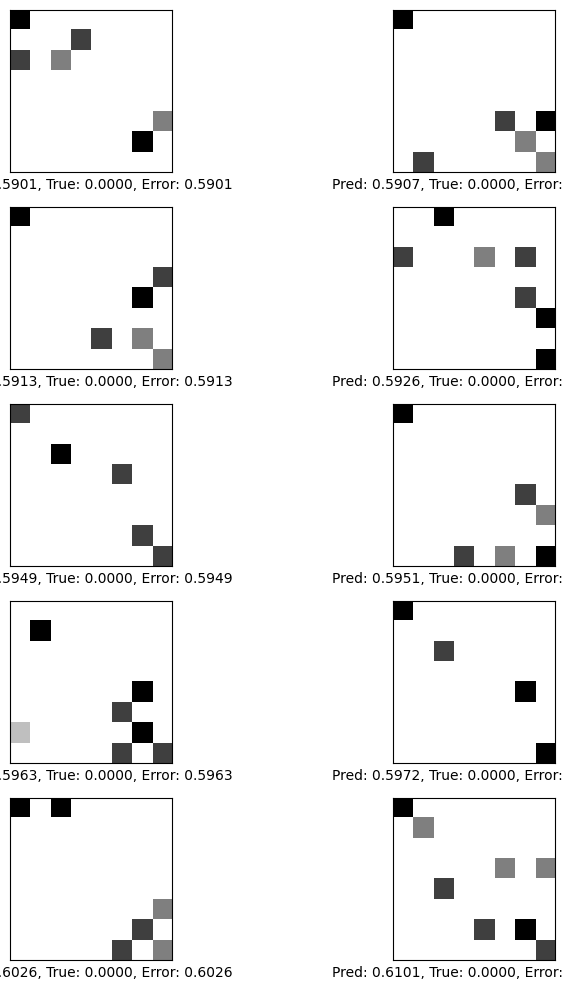

In [28]:
## Worst ones ##

import random
import numpy as np
import matplotlib.pyplot as plt

# Calculate absolute errors
errors = np.abs(predictions - y_test)

# Flatten the error array and get indices of the top 10 worst results
top_10_indices = np.argsort(errors.flatten())[-10:]

# Plot the worst 10 results
plt.figure(figsize=(10, 10))
for i, idx in enumerate(top_10_indices):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape for imshow
    plt.imshow(X_test[idx].reshape(matrice_len, matrice_height), cmap=plt.cm.binary)  
    plt.xlabel(f"Pred: {predictions[idx][0]:.4f}, True: {y_test[idx][0]:.4f}, Error: {errors[idx][0]:.4f}")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


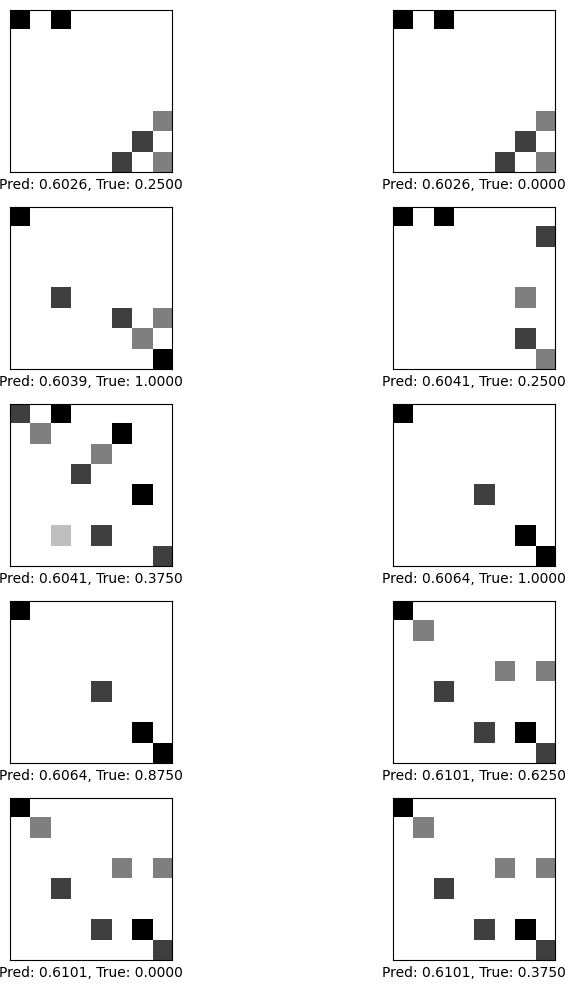

In [29]:
## highest prediction value ##
import random
import numpy as np
import matplotlib.pyplot as plt

# Get indices of the top 10 highest prediction values
top_10_indices = np.argsort(predictions.flatten())[-10:]

# Plot the top 10 predictions
plt.figure(figsize=(10, 10))
for i, idx in enumerate(top_10_indices):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Reshape for imshow
    plt.imshow(X_test[idx].reshape(matrice_len, matrice_height), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {predictions[idx][0]:.4f}, True: {y_test[idx][0]:.4f}")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
